## EDA

In [163]:
## Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [164]:
# Read in data
health_insurance = pd.read_csv('insurance.csv')

In [165]:
health_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [167]:
# Great! It seems like none of the data is missing.
print(health_insurance.shape)
print(health_insurance.sex.value_counts())

(1338, 7)
male      676
female    662
Name: sex, dtype: int64


### Creating visualizations about our data

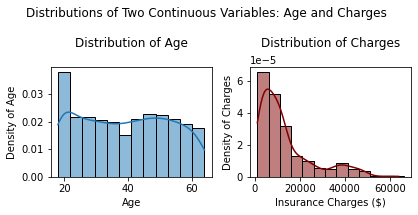

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(ncols=2, figsize = (6, 3))
age_hist = sns.histplot(data = health_insurance, x = 'age', stat = 'density', kde = True, ax = ax[0])
age_hist.set_title('Distribution of Age', pad = 20)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density of Age');

charges_hist = sns.histplot(data = health_insurance, x = 'charges', stat = 'density', kde = True, ax = ax[1], 
                           binwidth = 5000, color = 'maroon')
charges_hist.set_title('Distribution of Charges', pad = 20)
ax[1].set_xlabel('Insurance Charges ($)')
ax[1].set_ylabel('Density of Charges');

fig.suptitle('Distributions of Two Continuous Variables: Age and Charges', ha = 'center')
fig.tight_layout();

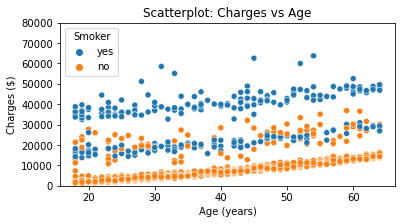

In [169]:
fig, ax = plt.subplots(figsize = (6, 3))
age_scatplot = sns.scatterplot(data = health_insurance, x = 'age', y = 'charges', hue = 'smoker')
ax.set_title('Scatterplot: Charges vs Age')
ax.set_ylim(0, 80000)
ax.set_xlabel('Age (years)')
ax.set_ylabel('Charges ($)')
plt.legend(loc = 'upper left', title = 'Smoker');

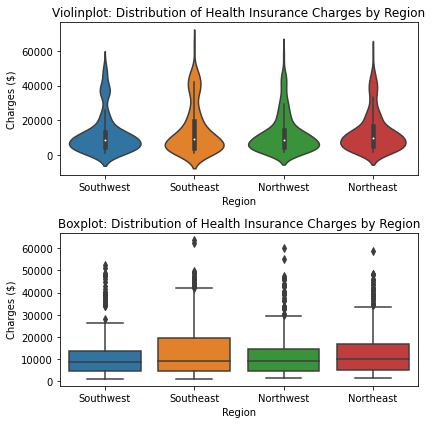

In [170]:
fig, ax = plt.subplots(nrows = 2, figsize = (6, 6))
region_violinplot = sns.violinplot(data = health_insurance, x = 'region', y = 'charges', ax = ax[0])
ax[0].set_title('Violinplot: Distribution of Health Insurance Charges by Region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Charges ($)')
labels = [item.get_text().capitalize() for item in ax[0].get_xticklabels()]
ax[0].set_xticklabels(labels = labels)

region_boxplot = sns.boxplot(data = health_insurance, x = 'region', y = 'charges', ax = ax[1])
ax[1].set_title('Boxplot: Distribution of Health Insurance Charges by Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Charges ($)')
ax[1].set_xticklabels(labels = labels)
fig.tight_layout();

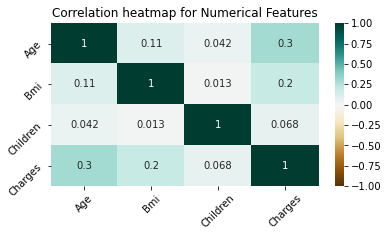

In [171]:
health_insurance_numeric = health_insurance[['age', 'bmi', 'children', 'charges']]
fig, ax = plt.subplots(figsize = (6, 3))
heat_map = sns.heatmap(health_insurance_numeric.corr(), vmin = -1, vmax = 1, annot = True, 
                      cmap = 'BrBG')
labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels = labels)
ax.set_yticklabels(labels = labels)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_title('Correlation heatmap for Numerical Features');

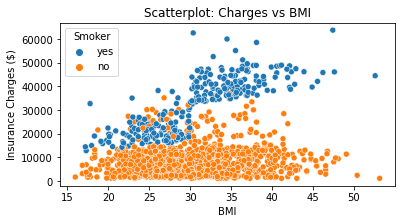

In [173]:
fig, ax = plt.subplots(figsize = (6, 3))
bmi_scatterplot = sns.scatterplot(data = health_insurance, x = 'bmi', y ='charges', hue = 'smoker')
bmi_scatterplot.set_title('Scatterplot: Charges vs BMI')
ax.set_ylabel('Insurance Charges ($)')
ax.set_xlabel('BMI')
plt.legend(loc = 'upper left', title = 'Smoker')
plt.show();

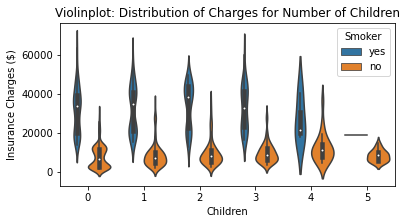

In [175]:
fig, ax = plt.subplots(figsize = (6, 3))
children_violinplot = sns.violinplot(data = health_insurance, x='children', y='charges', hue = 'smoker')
children_violinplot.set_title('Violinplot: Distribution of Charges for Number of Children')
ax.set_ylabel('Insurance Charges ($)')
ax.set_xlabel('Children')
plt.legend(loc = 'upper right', title = 'Smoker')
plt.show();

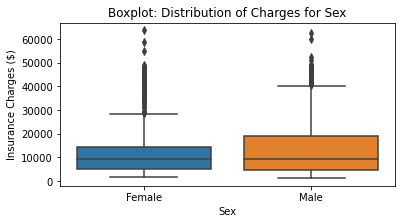

In [177]:
fig, ax = plt.subplots(figsize = (6, 3))
sex_boxplot = sns.boxplot(data = health_insurance, x = 'sex', y = 'charges')
sex_boxplot.set_title('Boxplot: Distribution of Charges for Sex')
ax.set_ylabel('Insurance Charges ($)')
ax.set_xlabel('Sex')
labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels = labels);

## Fitting Machine Learning Models

In [134]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
health_insurance['age'] = standard_scaler.fit_transform(health_insurance['age'].values.reshape(-1, 1))
health_insurance['bmi'] = standard_scaler.fit_transform(health_insurance['bmi'].values.reshape(-1, 1))
health_insurance['children'] = standard_scaler.fit_transform(health_insurance['children'].values.reshape(-1, 1))
health_insurance['charges'] = standard_scaler.fit_transform(health_insurance['charges'].values.reshape(-1, 1))
health_insurance = health_insurance[['age', 'bmi', 'children', 'smoker', 'charges']]

In [135]:
health_insurance.head()

,age,bmi,children,smoker,charges
0,-1.438764,-0.453320,-0.908614,yes,0.298584
1,-1.509965,0.509621,-0.078767,no,-0.953689
2,-0.797954,0.383307,1.580926,no,-0.728675
3,-0.441948,-1.305531,-0.908614,no,0.719843
4,-0.513149,-0.292556,-0.908614,no,-0.776802


In [136]:
# one-hot encoding
health_insurance_dummies = pd.get_dummies(health_insurance)
print("Features after one-hot encoding:\n", list(health_insurance_dummies.columns))

Features after one-hot encoding:
 ['age', 'bmi', 'children', 'charges', 'smoker_no', 'smoker_yes']


In [137]:
health_insurance_dummies.head()

,age,bmi,children,charges,smoker_no,smoker_yes
0,-1.438764,-0.453320,-0.908614,0.298584,0,1
1,-1.509965,0.509621,-0.078767,-0.953689,1,0
2,-0.797954,0.383307,1.580926,-0.728675,1,0
3,-0.441948,-1.305531,-0.908614,0.719843,1,0
4,-0.513149,-0.292556,-0.908614,-0.776802,1,0


In [138]:
X = health_insurance_dummies.drop(columns = ['charges']).values
Y = health_insurance_dummies['charges'].values
display(X[:5])
display(Y[:5])

array([[-1.43876426, -0.45332   , -0.90861367,  0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719,  1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576,  1.        ,  0.        ],
       [-0.4419476 , -1.30553108, -0.90861367,  1.        ,  0.        ],
       [-0.51314879, -0.29255641, -0.90861367,  1.        ,  0.        ]])

array([ 0.2985838 , -0.95368917, -0.72867467,  0.71984298, -0.77680218])

## LinearSVR and SVR

In [139]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.80, random_state = 0)
linear_svr = LinearSVR(max_iter=10000).fit(X = X_train, y = y_train)

In [140]:
linear_svr.score(X_train, y_train)

0.6504978978170263

In [141]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel = 'rbf', C=5).fit(X=X_train, y=y_train)
svr.score(X_test, y_test)

param_grid = {'C':np.linspace(1, 3, num=20)}
grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3)
grid_svr.fit(X_train, y_train)
print(grid_svr.best_params_)
grid_svr.best_estimator_.fit(X_train, y_train).score(X_test, y_test)

{'C': 3.0}


0.8956107010622589

## Ridge and Lasso Regression

In [142]:
from sklearn.linear_model import Ridge
ridge = Ridge(max_iter = 100000).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7976558146780917

In [143]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 100000).fit(X_train, y_train)
lasso.score(X_test, y_test)

-0.0007509437736332725

In [144]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(Lasso(max_iter = 100000), param_grid, cv = 7)

In [145]:
# Using GridSearchCV to find the optimum parameters
grid_lasso.fit(X, Y)
print(grid_lasso.best_params_)
lasso_best = grid_lasso.best_estimator_
lasso_best.fit(X_train, y_train).score(X_test, y_test)

{'alpha': 0.01}


0.7944940300306852

In [146]:
# Using GridSearchCV to find the optimum parameters
grid_ridge = GridSearchCV(Ridge(max_iter = 100000), param_grid, cv=7)
grid_ridge.fit(X, Y)
print(grid_ridge.best_params_)
ridge_best = grid_ridge.best_estimator_
ridge_best.fit(X_train, y_train).score(X_test, y_test)

{'alpha': 1}


0.7976558146780917

## K Nearest Neighbors (Regressor)

In [147]:
## K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_test, y_test)

0.8708205429954053

In [148]:
n_neighbors = np.arange(3, 11)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors':n_neighbors, 'weights':weights, 'algorithm':algorithm}
grid_knr = GridSearchCV(KNeighborsRegressor(), param_grid, cv=7)

In [149]:
grid_knr.fit(X, Y)
print(grid_knr.best_params_)
knr_best = grid_knr.best_estimator_
knr_best.fit(X_train, y_train).score(X_test, y_test)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


0.8805280203121062

## Random Forest Regressor

In [150]:
## Random Forest 
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RFR.score(X_test, y_test)

0.867346788797357

## Gradient Boost

In [151]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss = 'ls', n_estimators=100).fit(X_train, y_train)
GBR.score(X_test, y_test)

0.8971331195921077

In [152]:
param_grid = {'learning_rate':[0.01, 0.1, 1, 10]}
grid_GBR = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=2)
grid_GBR.fit(X_train, y_train)
print(grid_GBR.best_params_)
print(grid_GBR.best_estimator_.fit(X_train, y_train).score(X_test, y_test))

C:\Users\aksha\.anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


{'learning_rate': 0.1}
0.897145293230722


## Ensemble of Methods

In [160]:
from sklearn.ensemble import StackingRegressor
estimators = [('gbr', GradientBoostingRegressor(loss = 'ls')), ('SVR', SVR(kernel='rbf', C=3.0)),
             ('knr', KNeighborsRegressor(algorithm = 'auto', n_neighbors = 9, weights = 'uniform')), 
             ('rfr', RandomForestRegressor(n_estimators = 100))]
reg = StackingRegressor(estimators=estimators, final_estimator=Lasso(max_iter = 100000, alpha = 0.01))
reg.fit(X_train, y_train).score(X_test, y_test)

0.902401752588784

## Cross Validation

In [162]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X, Y, cv = 6)

array([0.87777614, 0.85416081, 0.81050571, 0.91392048, 0.83053464,
       0.85498718])